In [1]:
import pandas as pd
# Program to extract number
# of rows using Python
#import xlrd
 
# Give the location of the file
#loc = ("C:\Users\user\Downloads\rocmintemp1a.csv")
df = pd.read_csv("C:\\Users\\user\\Downloads\\rocmintemp1a.csv")
print(df.head())
print('ldlsl')


       STATION      DATE   MIN
0  72529014768  01/01/73  33.8
1  72529014768  01/02/73  21.2
2  72529014768  01/03/73  21.2
3  72529014768  01/04/73  34.0
4  72529014768  01/05/73  24.8
ldlsl


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  17897 non-null  int64  
 1   DATE     17897 non-null  object 
 2   MIN      17897 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 419.6+ KB
None


In [3]:
print(df.shape)

(17897, 3)


In [4]:
print(df.describe())

            STATION           MIN
count  1.789700e+04  17897.000000
mean   7.252901e+10     39.867112
std    0.000000e+00     76.504429
min    7.252901e+10    -22.000000
25%    7.252901e+10     27.000000
50%    7.252901e+10     39.000000
75%    7.252901e+10     54.000000
max    7.252901e+10   9999.900000


In [5]:
dmin = df[df['MIN'] == -22.0]
print(dmin)

          STATION      DATE   MIN
2239  72529014768  02/18/79 -22.0


In [6]:
print(df['MIN'].value_counts())

 32.0    440
 59.0    364
 50.0    351
 33.1    351
 34.0    341
        ... 
 0.1       1
 40.8      1
-13.0      1
 75.2      1
 79.0      1
Name: MIN, Length: 200, dtype: int64


In [7]:
df2 = df[df['MIN'] < 100.0]
print(df2.shape)

(17896, 3)


In [8]:
print(df2)

           STATION      DATE   MIN
0      72529014768  01/01/73  33.8
1      72529014768  01/02/73  21.2
2      72529014768  01/03/73  21.2
3      72529014768  01/04/73  34.0
4      72529014768  01/05/73  24.8
...            ...       ...   ...
17892  72529014768  12/27/21  26.6
17893  72529014768  12/28/21  27.0
17894  72529014768  12/29/21  32.0
17895  72529014768  12/30/21  32.0
17896  72529014768  12/31/21  35.1

[17896 rows x 3 columns]


In [9]:
df2 = df2[df2['MIN'] > -23.0]
print(df2.shape)

(17896, 3)


In [10]:
df2['DATE'] = pd.to_datetime(df['DATE'])
print(df2.shape)
print(df2.head(90))

(17896, 3)
        STATION       DATE   MIN
0   72529014768 1973-01-01  33.8
1   72529014768 1973-01-02  21.2
2   72529014768 1973-01-03  21.2
3   72529014768 1973-01-04  34.0
4   72529014768 1973-01-05  24.8
..          ...        ...   ...
86  72529014768 1973-03-28  24.1
87  72529014768 1973-03-29  46.9
88  72529014768 1973-03-30  47.8
89  72529014768 1973-03-31  46.9
90  72529014768 1973-04-01  52.9

[90 rows x 3 columns]


In [11]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())

       STATION       DATE   MIN  year  month
0  72529014768 1973-01-01  33.8  1973      1
1  72529014768 1973-01-02  21.2  1973      1
2  72529014768 1973-01-03  21.2  1973      1
3  72529014768 1973-01-04  34.0  1973      1
4  72529014768 1973-01-05  24.8  1973      1


In [12]:
df2 = df2[(df2['month'] > 10) | (df2['month'] < 4)]
print(df2.shape)

(7410, 5)


In [15]:
df2['season'] = df2.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 4 else f"{x['year']}/{x['year']+1}", axis=1)
print(df2.head())

       STATION       DATE   MIN  year  month     season
0  72529014768 1973-01-01  33.8  1973      1  1972/1973
1  72529014768 1973-01-02  21.2  1973      1  1972/1973
2  72529014768 1973-01-03  21.2  1973      1  1972/1973
3  72529014768 1973-01-04  34.0  1973      1  1972/1973
4  72529014768 1973-01-05  24.8  1973      1  1972/1973


In [17]:
meeny = df2.groupby(['season'])['MIN'].mean()

In [18]:
print(meeny)

season
1972/1973    24.198876
1973/1974    23.337086
1974/1975    24.570199
1975/1976    23.226974
1976/1977    19.209272
1977/1978    19.903311
1978/1979    20.125166
1979/1980    22.036842
1980/1981    19.670199
1981/1982    21.435762
1982/1983    28.646358
1983/1984    23.415132
1984/1985    24.221192
1985/1986    24.336424
1986/1987    24.141060
1987/1988    24.255263
1988/1989    24.452318
1989/1990    23.760265
1990/1991    26.871523
1991/1992    23.961184
1992/1993    22.670199
1993/1994    20.135099
1994/1995    26.705298
1995/1996    19.465132
1996/1997    24.541060
1997/1998    27.616556
1998/1999    24.129801
1999/2000    25.176316
2000/2001    21.903311
2001/2002    27.420530
2002/2003    20.352980
2003/2004    22.512500
2004/2005    20.798013
2005/2006    25.683444
2006/2007    26.050331
2007/2008    23.155921
2008/2009    21.987417
2009/2010    23.896026
2010/2011    20.884106
2011/2012    28.695395
2012/2013    25.317219
2013/2014    18.534437
2014/2015    18.614570
2015

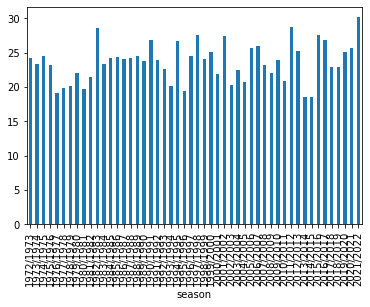

In [22]:
import matplotlib.pyplot as plt
meeny.plot.bar()
plt.show()

In [26]:
zippo = df2.groupby('season')['MIN'].apply(lambda x: x[x < 0.0].count())
print(zippo)

season
1972/1973     3
1973/1974     5
1974/1975     0
1975/1976     8
1976/1977     8
1977/1978    11
1978/1979    13
1979/1980     4
1980/1981    14
1981/1982     8
1982/1983     1
1983/1984     5
1984/1985     3
1985/1986     1
1986/1987     3
1987/1988     3
1988/1989     1
1989/1990     4
1990/1991     0
1991/1992     0
1992/1993     6
1993/1994    12
1994/1995     0
1995/1996     6
1996/1997     2
1997/1998     0
1998/1999     4
1999/2000     7
2000/2001     0
2001/2002     0
2002/2003    13
2003/2004     9
2004/2005     9
2005/2006     0
2006/2007     0
2007/2008     0
2008/2009     0
2009/2010     2
2010/2011     3
2011/2012     0
2012/2013     0
2013/2014    14
2014/2015    15
2015/2016     3
2016/2017     0
2017/2018     7
2018/2019     4
2019/2020     0
2020/2021     0
2021/2022     0
Name: MIN, dtype: int64


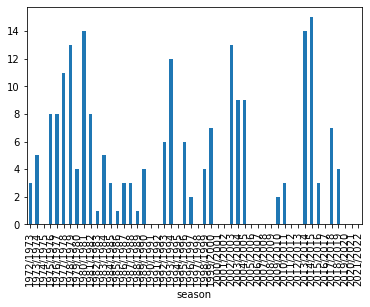

In [27]:
import matplotlib.pyplot as plt
zippo.plot.bar()
plt.show()